<a href="https://colab.research.google.com/github/moah384/FasterViT/blob/main/icare_SWIN_attemp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yacs
!pip install --upgrade torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 8.9.2.26
    Uninstalling nvidia-cudnn-cu12-8.9.2.26:
      Successfully uninstalled nvidia-cudnn-cu12-8.9.2.26
  Attempting uninstall: torch
    Found existing installation: torch 2.3.1+cu121
    Uninstalling torch-2.3.1+cu121:
      Successfully uninstalled torch-2.3.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.

In [ ]:
!pip install einops

In [ ]:
!git clone https://github.com/microsoft/Swin-Transformer.git
%cd Swin-Transformer


Cloning into 'Swin-Transformer'...
remote: Enumerating objects: 404, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 404 (delta 5), reused 9 (delta 4), pack-reused 387 (from 1)
Receiving objects: 100% (404/404), 1.08 MiB | 1.21 MiB/s, done.
Resolving deltas: 100% (230/230), done.
/content/Swin-Transformer


In [ ]:
!pip install torch torchvision timm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# This will open the file explorer in Colab
%cd /content/Swin-Transformer/configs/


/content/Swin-Transformer/configs


In [ ]:
import yaml

# Load the YAML file
config_file = '/content/Swin-Transformer/configs/swin/swin_tiny_patch4_window7_224.yaml'

with open(config_file, 'r') as file:
    config = yaml.safe_load(file)

# Modify the num_classes field
config['MODEL']['NUM_CLASSES'] = 2

# Save the changes back to the file
with open(config_file, 'w') as file:
    yaml.dump(config, file)

print("Updated the number of classes to 2")


Updated the number of classes to 2


In [ ]:
file_path = '/content/Swin-Transformer/main.py'

# Read the content of main.py
with open(file_path, 'r') as file:
    lines = file.readlines()

# Modify the lines to skip the distributed initialization
new_lines = []
for line in lines:
    if "torch.distributed.init_process_group" in line:
        new_lines.append("if 'WORLD_SIZE' in os.environ and int(os.environ['WORLD_SIZE']) > 1:\n")
    else:
        new_lines.append(line)

# Write the modified content back to main.py
with open(file_path, 'w') as file:
    file.writelines(new_lines)

print("main.py has been modified successfully.")



main.py has been modified successfully.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import timm
from torchvision import transforms, datasets

# Define paths
train_dir = '/content/drive/MyDrive/icaremodel3/training'
val_dir = '/content/drive/MyDrive/icaremodel3/validation'

# Define a simple dataset loader
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the Swin-Tiny model
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=2)
model = model.cuda()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

    # Validation loop
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Accuracy: {100 * correct / total:.2f}%")

print("Training complete.")







/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

Epoch 1/5, Loss: 0.6325037348068366
Validation Accuracy: 76.51%
Epoch 2/5, Loss: 0.40325020859807226
Validation Accuracy: 86.42%
Epoch 3/5, Loss: 0.33438530463283345
Validation Accuracy: 87.50%
Epoch 4/5, Loss: 0.25657936469730686
Validation Accuracy: 86.42%
Epoch 5/5, Loss: 0.18482945819969399
Validation Accuracy: 85.78%
Training complete.


In [ ]:
# Save the model after training
model_save_path = '/content/drive/MyDrive/icaremodel3/swin_tiny_model.pth'
torch.save(model.state_dict(), model_save_path)


AUC: 0.913


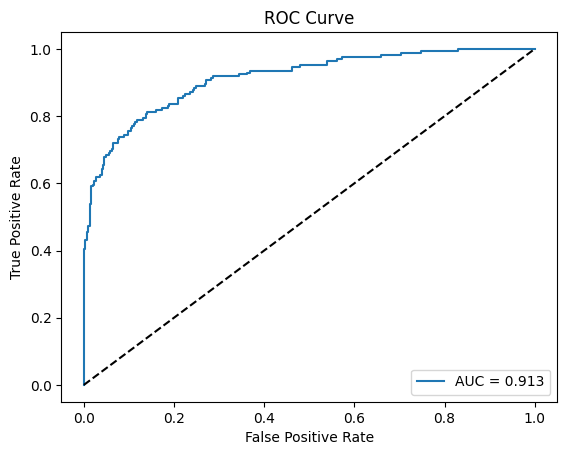

Sensitivity: 0.807
Specificity: 0.859


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import timm
from torchvision import transforms, datasets
from PIL import Image
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define the test dataset path
test_dir = '/content/drive/MyDrive/icaremodel3/test'

# Load the test data
test_dataset = datasets.ImageFolder(test_dir, transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predictions
all_labels = []
all_probs = []

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.cuda()
        labels = labels.cuda()
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability of class 1

        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Compute AUC
auc = roc_auc_score(all_labels, all_probs)
print(f"AUC: {auc:.3f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Compute Sensitivity and Specificity
threshold = 0.5
predictions = (all_probs > threshold).astype(int)
conf_matrix = confusion_matrix(all_labels, predictions)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")



Inference

In [ ]:
# Load the model from Google Drive
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=2)
model_save_path = '/content/drive/MyDrive/icaremodel3/swin_tiny_model.pth'
model.load_state_dict(torch.load(model_save_path))
model = model.cuda()


<ipython-input-34-3e854493d781>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


In [ ]:
from PIL import Image

def predict_image(image_path, model, transform):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).cuda()

    model.eval()
    with torch.no_grad():
        output = model(image)
        probs = torch.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probs, 1)

    return predicted_class.item(), confidence.item()


In [ ]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display

# Upload image function
def upload_and_predict():
    uploaded = files.upload()

    for fn in uploaded.keys():
        image_path = fn
        predicted_class, confidence = predict_image(image_path, model, val_transform)
        print(f"Predicted class: {predicted_class}, Confidence: {confidence:.3f}")

# Button for uploading images
upload_button = widgets.Button(description="Upload Image and Predict")
upload_button.on_click(lambda x: upload_and_predict())
display(upload_button)


Button(description='Upload Image and Predict', style=ButtonStyle())

Saving img-00002-00001.jpg to img-00002-00001 (2).jpg
Input shape: torch.Size([1, 3, 224, 224])
Predicted class: 712, Confidence: 0.012


Inference with attention

In [ ]:
!pip install captum


In [ ]:
# Load the model from Google Drive
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=2)
model_save_path = '/content/drive/MyDrive/icaremodel3/swin_tiny_model.pth'
model.load_state_dict(torch.load(model_save_path))
model = model.cuda()

In [ ]:
torch.cuda.empty_cache()


<ipython-input-13-7891662be3a9>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Button(description='Upload Image and Predict', style=ButtonStyle())

Saving img-00001-00001.jpg to img-00001-00001 (10).jpg
Input shape: torch.Size([1, 3, 224, 224])


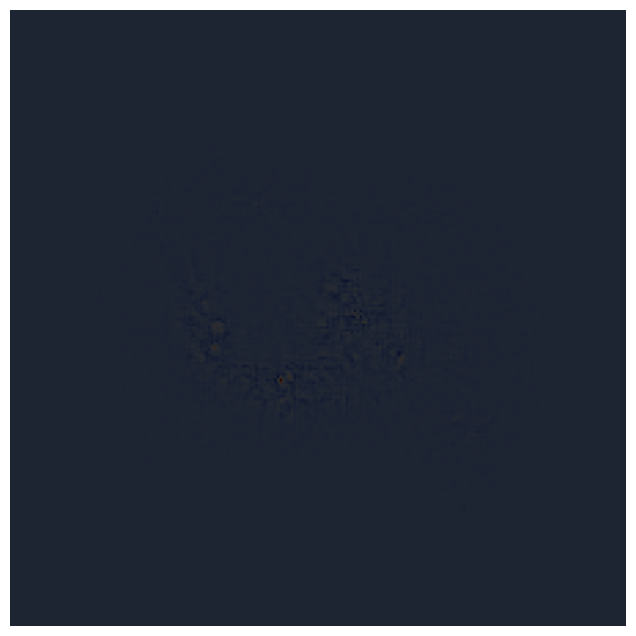

Predicted class: 1, Confidence: 0.750


In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from google.colab import files
from IPython.display import display
import timm
from torchvision import transforms
from captum.attr import IntegratedGradients, visualization
import numpy as np

# Load the Swin Transformer model
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=2)
model_save_path = '/content/drive/MyDrive/icaremodel3/swin_tiny_model.pth'
model.load_state_dict(torch.load(model_save_path))
model = model.cuda()

# Define the image transformation
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to get prediction and visualize using Captum
def predict_and_explain(image_path, model, transform):
    image = Image.open(image_path)
    input_tensor = transform(image).unsqueeze(0).cuda()

    print(f"Input shape: {input_tensor.shape}")

    model.eval()
    torch.cuda.empty_cache()
    with torch.no_grad():
        output = model(input_tensor)
        probs = F.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probs, 1)

    # Use Captum's IntegratedGradients with reduced steps to save memory
    ig = IntegratedGradients(model)
    attributions = ig.attribute(input_tensor, target=predicted_class.item(), n_steps=50)

    # Convert attributions to a numpy array and normalize them
    attributions = attributions[0].cpu().permute(1, 2, 0).detach().numpy()
    attributions = np.mean(attributions, axis=-1)  # Average over color channels
    attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())  # Normalize to [0, 1]

    # Overlay attributions on the original image
    plt.figure(figsize=(8, 8))
    plt.imshow(image, alpha=1.0)  # Original image with full opacity
    plt.imshow(attributions, cmap='coolwarm', alpha=0.2)  # Using 'coolwarm' colormap and reduce alpha for more transparency
    plt.axis('off')
    plt.show()

    return predicted_class.item(), confidence.item()

# Function to handle image upload and prediction
def upload_and_predict():
    uploaded = files.upload()

    for fn in uploaded.keys():
        image_path = fn
        predicted_class, confidence = predict_and_explain(image_path, model, val_transform)

        # Display the results
        print(f"Predicted class: {predicted_class}, Confidence: {confidence:.3f}")

# Create a button widget
upload_button = widgets.Button(description="Upload Image and Predict")
upload_button.on_click(lambda x: upload_and_predict())
display(upload_button)


Interpretation

In [ ]:
!pip install torch torchvision timm matplotlib


In [ ]:
# Load the model from Google Drive
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=2)
model_save_path = '/content/drive/MyDrive/icaremodel3/swin_tiny_model.pth'
model.load_state_dict(torch.load(model_save_path))
model = model.cuda()

<ipython-input-36-80a1def8e89c>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Button(description='Upload Image and Predict', style=ButtonStyle())

Saving img-00002-00001.jpg to img-00002-00001 (5).jpg


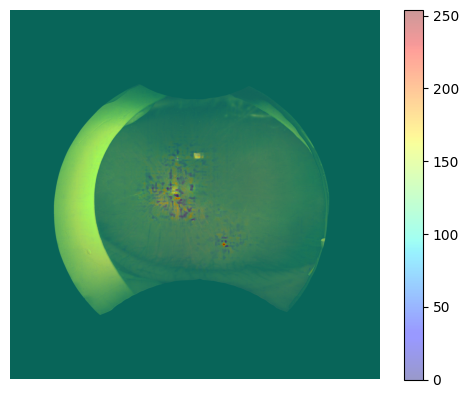

Predicted class: 0, Confidence: 0.517


In [ ]:
import torch
import timm
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from google.colab import files
from captum.attr import IntegratedGradients

# Load the custom trained Swin Transformer model with 2 classes from Google Drive
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=2)
model_save_path = '/content/drive/MyDrive/icaremodel3/swin_tiny_model.pth'
model.load_state_dict(torch.load(model_save_path))
model = model.cuda()
model.eval()

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to predict and explain
def predict_and_explain(image_path, model, transform):
    image = Image.open(image_path)
    input_tensor = transform(image).unsqueeze(0).cuda()

    with torch.no_grad():
        output = model(input_tensor)
        probs = F.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probs, 1)

    # Use Captum's IntegratedGradients
    ig = IntegratedGradients(model)
    attributions = ig.attribute(input_tensor, target=predicted_class.item(), n_steps=50)

    attributions = attributions[0].cpu().permute(1, 2, 0).detach().numpy()
    attributions = np.mean(attributions, axis=-1)
    attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())

    attributions = Image.fromarray((attributions * 255).astype('uint8'))
    attributions = attributions.resize(image.size, Image.BILINEAR)

    attributions = np.array(attributions)
    plt.imshow(image)
    plt.imshow(attributions, cmap='jet', alpha=0.4)
    plt.colorbar()
    plt.axis('off')
    plt.show()

    return predicted_class.item(), confidence.item()

# Function to handle image upload and prediction
def upload_and_predict():
    uploaded = files.upload()

    for fn in uploaded.keys():
        image_path = fn
        predicted_class, confidence = predict_and_explain(image_path, model, transform)

        print(f"Predicted class: {predicted_class}, Confidence: {confidence:.3f}")

# Create a button widget
upload_button = widgets.Button(description="Upload Image and Predict")
upload_button.on_click(lambda x: upload_and_predict())
display(upload_button)


<ipython-input-40-a6c03779b4da>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Button(description='Upload Image and Predict', style=ButtonStyle())

Saving img-00001-00001.jpg to img-00001-00001 (25).jpg


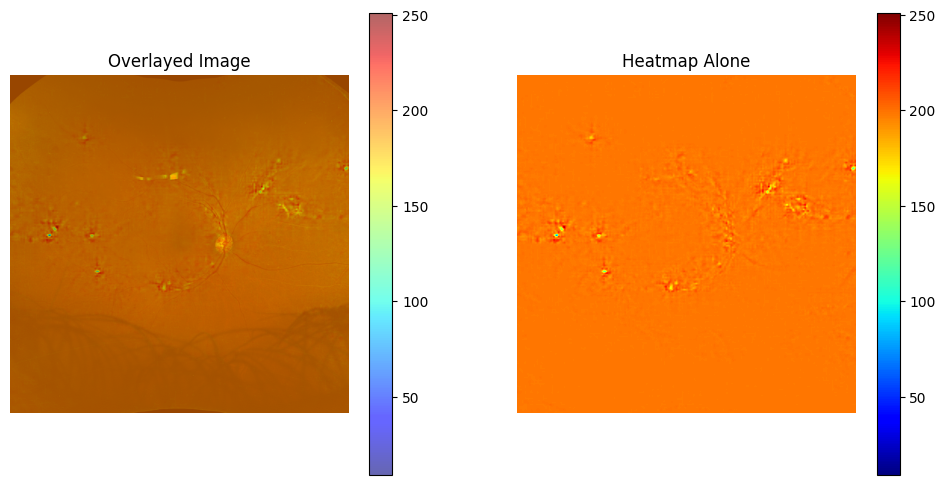

Predicted class: 1, Confidence: 0.845


In [ ]:
import torch
import timm
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from google.colab import files
from captum.attr import IntegratedGradients

# Load the custom trained Swin Transformer model with 2 classes from Google Drive
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=2)
model_save_path = '/content/drive/MyDrive/icaremodel3/swin_tiny_model.pth'
model.load_state_dict(torch.load(model_save_path))
model = model.cuda()
model.eval()

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to crop the image to 2000x2000 pixels centered
def crop_center(image, crop_width, crop_height):
    width, height = image.size   # Get dimensions
    left = (width - crop_width) / 2
    top = (height - crop_height) / 2
    right = (width + crop_width) / 2
    bottom = (height + crop_height) / 2

    return image.crop((left, top, right, bottom))

# Function to predict and explain
def predict_and_explain(image_path, model, transform):
    image = Image.open(image_path)

    # Crop the image to 2000x2000 pixels centered
    cropped_image = crop_center(image, 2000, 2000)

    # Transform the cropped image
    input_tensor = transform(cropped_image).unsqueeze(0).cuda()

    # Model prediction
    with torch.no_grad():
        output = model(input_tensor)
        probs = F.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probs, 1)

    # Use Captum's IntegratedGradients
    ig = IntegratedGradients(model)
    attributions = ig.attribute(input_tensor, target=predicted_class.item(), n_steps=50)

    # Convert attributions to a numpy array and normalize them
    attributions = attributions[0].cpu().permute(1, 2, 0).detach().numpy()
    attributions = np.mean(attributions, axis=-1)  # Average over color channels
    attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())  # Normalize to [0, 1]

    # Increase contrast of the heatmap
    attributions = np.power(attributions, 0.5)  # Adjust the exponent to increase contrast

    # Convert attributions to an image for overlaying
    attributions_image = Image.fromarray((attributions * 255).astype('uint8'))
    attributions_image = attributions_image.resize(cropped_image.size, Image.BILINEAR)

    # Overlay the heatmap on the original image
    plt.figure(figsize=(12, 6))

    # Display overlayed image
    plt.subplot(1, 2, 1)
    plt.imshow(cropped_image)
    plt.imshow(attributions_image, cmap='jet', alpha=0.6)  # Adjust alpha for visibility
    plt.colorbar()
    plt.axis('off')
    plt.title('Overlayed Image')

    # Display heatmap alone
    plt.subplot(1, 2, 2)
    plt.imshow(attributions_image, cmap='jet')
    plt.colorbar()
    plt.axis('off')
    plt.title('Heatmap Alone')

    plt.show()

    return predicted_class.item(), confidence.item()

# Function to handle image upload and prediction
def upload_and_predict():
    uploaded = files.upload()

    for fn in uploaded.keys():
        image_path = fn
        predicted_class, confidence = predict_and_explain(image_path, model, transform)

        print(f"Predicted class: {predicted_class}, Confidence: {confidence:.3f}")

# Create a button widget
upload_button = widgets.Button(description="Upload Image and Predict")
upload_button.on_click(lambda x: upload_and_predict())
display(upload_button)
